In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pylab as pl


# Fetching data sets and inserting them into frame

In [292]:
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)
print(lfw_people.images.shape)

(1140, 50, 37)


# Target Names

In [293]:
print(lfw_people.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [294]:
print(lfw_people.target)

[2 3 1 ... 4 2 4]


# Feature Extraction

In [295]:
# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = lfw_people.data
n_features = X.shape[1]

# Labels of images 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number samples   = {0:d}".format(n_samples))
print("Number features   = {0:d}".format(n_features))
print("Number classes = {0:d}".format(n_classes)) 

Image size     = 50 x 37 = 1850 pixels
Number samples   = 1140
Number features   = 1850
Number classes = 5


# Average no of samples for each class

In [296]:
n_samples / n_classes 

228.0

# Ploting of target images from the random selection of dataset

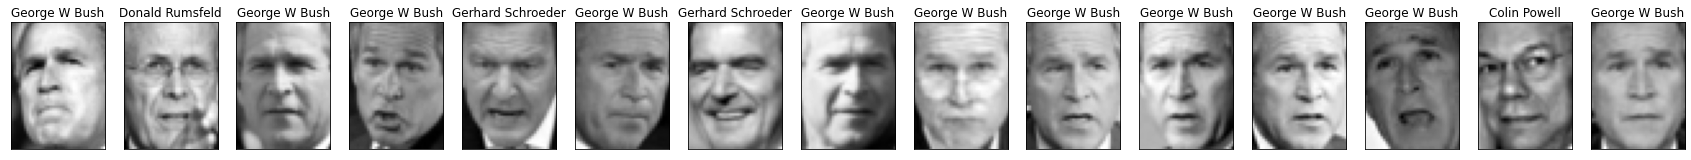

In [297]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.permutation(n_samples)
plt.figure(figsize=(30,50))
nplt = 15;
for i in range(nplt):    
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(X[ind])
    plt.title(target_names[y[ind]])

# **Computing the PCA via an SVD**

> First, we subtract the mean from the data set.

In [298]:
# global centering
npix = h*w
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]

In [299]:
U,S,Vtr = np.linalg.svd(Xs, full_matrices=False)

In [300]:
# Use this block as a black box for plotting the learining curve
# Feel free to dive into the code and figure out how it works
# There's no need to copy and paste this block again.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt
  


# We can plot the proportion of variance as a function of the number of PCs

Text(0, 0.5, 'PoV')

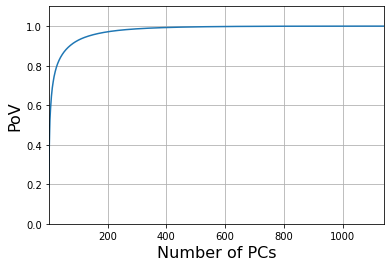

In [301]:
lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.grid()
plt.axis([1,n_samples,0, 1.1])
plt.xlabel('Number of PCs', fontsize=16)
plt.ylabel('PoV', fontsize=16)


*   Z is the coefficient of the samples on the data
*   W are the PC components

In [302]:
nsamp = X.shape[0]
ncomp = 20
Z = U[:,:ncomp]*S[None,:ncomp]
print(Z)

[[ 5.0909296e+02  1.4383766e+02 -2.2859538e+02 ... -1.9747610e+01
   5.1292580e+01 -6.7724655e+01]
 [ 8.2000647e+02 -2.8131613e+02  1.3111716e+02 ... -9.1715958e+01
   2.3370544e+01  1.4141485e+01]
 [-6.5261700e+02 -2.9089597e+02 -5.4303986e+02 ... -2.3317546e+02
   7.2123367e+01  1.7742712e+02]
 ...
 [ 5.1173871e+02  4.1835886e+02  1.1828875e+02 ...  2.9756580e+02
  -2.3780759e+02  3.4620779e+02]
 [ 4.6883691e+02  3.7108960e+02  1.2865046e+03 ...  6.8678036e-02
  -6.0741665e+01 -6.6013608e+00]
 [-1.6783627e+03 -6.9054858e+02 -1.1252605e+03 ... -5.1151241e+01
  -1.4303055e+02 -3.4862839e+01]]


# PCA with sklearn built in method as follow





In [331]:
from sklearn.decomposition import PCA

# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)
k =PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(X)
k_pca = pca.fit(X).transform(X)

In [304]:
Zwhiten = U[:,:ncomp]*np.sqrt(nsamp)
Zwhiten_pca = pca.transform(X)

# Print the coefficients for sample 0
print(Zwhiten_pca[0,:5])
print(Zwhiten[0,:5])

[-0.7370199  -0.2263957  -0.5227435   0.07414181  0.05228258]
[ 0.73734194  0.2264947  -0.5229734   0.07417396 -0.05230488]


In [305]:
Vtr_pca = pca.components_
print(Vtr_pca[0,:5])
print(Vtr[0,:5])

[-0.0059631  -0.00655038 -0.00780756 -0.00963158 -0.01108384]
[0.00596308 0.00655037 0.00780755 0.00963157 0.01108383]


# preprocessing and reconstruction

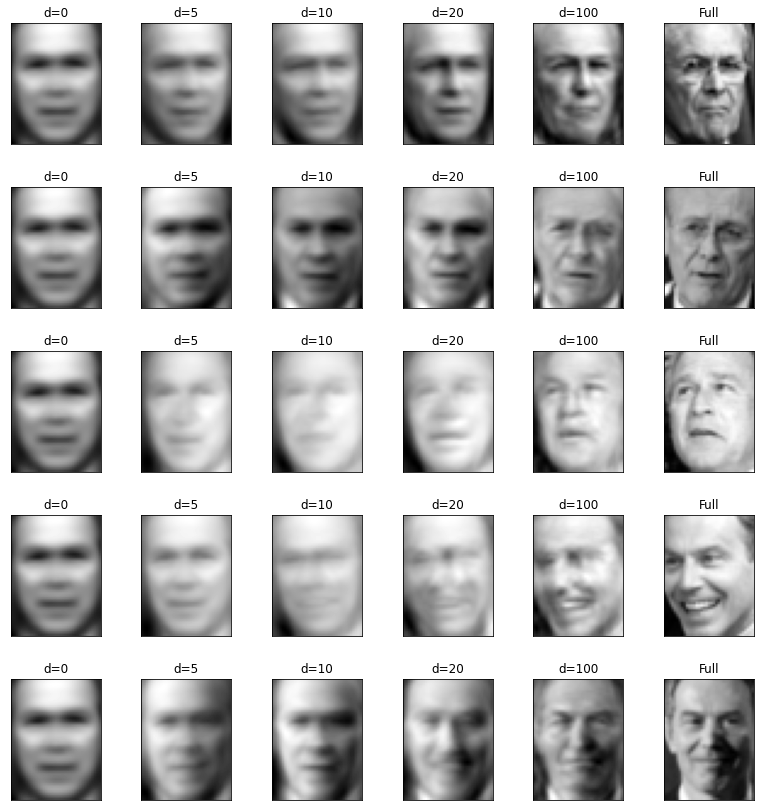

In [306]:
nplt = 5              # number of faces to plot
ds = [0,5,10,20,100]   # number of SVD approximations
use_pca = True         # True=Use sklearn reconstruction, else use SVD

if use_pca:
    # Construct the PCA object for the max number of coefficient
    dmax = np.max(ds)
    pca = PCA(n_components=dmax, svd_solver='randomized', whiten=True)
    
    # Fit and transform the data
    pca.fit(X)
    Z = pca.transform(X)
    

# Fit the PCA components on the entire dataset
pca.fit(X)

# Select random faces
inds = np.random.permutation(n_samples)
inds = inds[:nplt]
nd = len(ds)

# Set figure size
plt.figure(figsize=(1.8 * (nd+1), 2.4 * nplt))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

# Loop over figures
iplt = 0
for ind in inds:
    for d in ds:
        plt.subplot(nplt,nd+1,iplt+1)
        if use_pca:
            # Zero out coefficients after d.  
            # Note, we need to copy to not overwrite the coefficients
            Zd = np.copy(Z[ind,:])
            Zd[d:] = 0
            Xhati = pca.inverse_transform(Zd)
        else:
            # Reconstruct with SVD
            Xhati = (U[ind,:d]*S[None,:d]).dot(Vtr[:d,:]) + Xmean
            
        plt_face(Xhati)
        plt.title('d={0:d}'.format(d))
        iplt += 1
    
    # Plot the true face
    plt.subplot(nplt,nd+1,iplt+1)
    plt_face(X[ind,:])
    plt.title('Full')
    iplt += 1

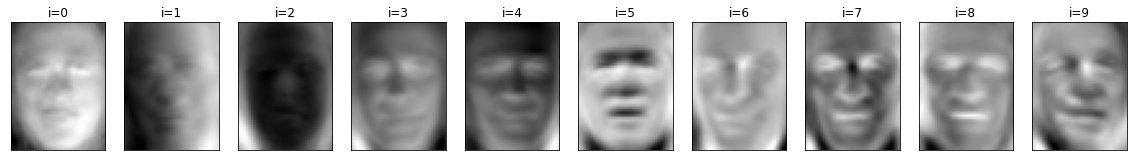

In [307]:
nplt = 10
plt.figure(figsize=(20, 40))
for i in range(nplt):
    plt.subplot(1,nplt,i+1)
    Vi = Vtr[i,:]
    plt_face(Vtr[i,:])
    plt.title('i={0:d}'.format(i))

In [308]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Extraction eigen faces based on several components

In [309]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_components = [25,50,75,100,150,200]
gam_test = [1e-3,4e-3,1e-2,1e-1]
C=100
n0 = len(n_components)
n1 = len(gam_test)
acc = np.zeros((n0,n1))
acc_max = 0
for i0, npc in enumerate(n_components):
  print("Extracting the top %d eigenfaces from %d faces" % (npc, X_train.shape[0]))
  t0 = time()
  pca = PCA(n_components=npc, svd_solver="randomized", whiten=True).fit(X_train)
  print("done in %0.3fs" % (time() - t0))
  eigenfaces = pca.components_.reshape((npc, h, w))
  print("Projecting the input data on the eigenfaces orthonormal basis")
  t0 = time()
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  print("done in %0.3fs" % (time() - t0))
  for i1, gam in enumerate(gam_test):
    # Fiting on the transformed training data
    svc = SVC(C=C, kernel='rbf', gamma = gam)
    svc.fit(X_train_pca , y_train)
    # Predict on the test data
    prediction = svc.predict(X_test_pca)
    # Compute the accuracy
    acc[i0,i1] = np.mean(prediction == y_test)
    print('npc=%d gam=%12.4e acc=%12.4e' % (npc,gam,acc[i0,i1]))
    # Save the optimal parameters
    if acc[i0,i1] > acc_max:
      gam_opt = gam
      npc_opt = npc
      acc_max = acc[i0,i1]

Extracting the top 25 eigenfaces from 798 faces
done in 0.257s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.018s
npc=25 gam=  1.0000e-03 acc=  7.9532e-01
npc=25 gam=  4.0000e-03 acc=  8.1871e-01
npc=25 gam=  1.0000e-02 acc=  8.0702e-01
npc=25 gam=  1.0000e-01 acc=  7.4854e-01
Extracting the top 50 eigenfaces from 798 faces
done in 0.232s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.031s
npc=50 gam=  1.0000e-03 acc=  8.5380e-01
npc=50 gam=  4.0000e-03 acc=  8.5380e-01
npc=50 gam=  1.0000e-02 acc=  8.5965e-01
npc=50 gam=  1.0000e-01 acc=  5.4094e-01
Extracting the top 75 eigenfaces from 798 faces
done in 0.366s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.017s
npc=75 gam=  1.0000e-03 acc=  8.5088e-01
npc=75 gam=  4.0000e-03 acc=  8.6842e-01
npc=75 gam=  1.0000e-02 acc=  8.8889e-01
npc=75 gam=  1.0000e-01 acc=  4.7076e-01
Extracting the top 100 eigenfaces from 798 faces
done in 0.406s
Projecting the input dat

Optimal num PCs = 75
Optimal gamma   = 0.010000


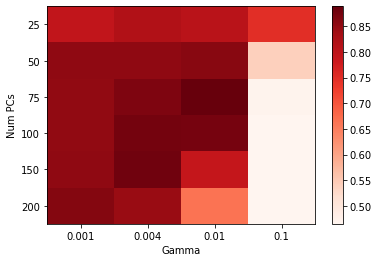

In [310]:
plt.imshow(acc, aspect='auto', cmap='Reds')
plt.xlabel('Gamma')
plt.ylabel('Num PCs')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,n1))
ax.set_xticklabels(gam_test)
ax.set_yticks(np.arange(0,n0))
_ = ax.set_yticklabels(n_components)

print('Optimal num PCs = %d' % (npc_opt))
print('Optimal gamma   = %f' % (gam_opt))


In [311]:
npc = npc_opt
gam = gam_opt

# Fit the transformer
pca = PCA(n_components=npc, svd_solver='randomized', whiten=True)
pca.fit(X_train)

# Transform the training and test
X_train_pca1 = pca.transform(X_train)
X_test_pca1 = pca.transform(X_test)

# Fiting on the transformed training data using rbf kernel
svc = SVC(C=C, kernel='rbf', gamma = gam)
svc.fit(X_train_pca1, y_train)
# Fiting on the transformed training data using poly kernel
svc2 = SVC(C=C, kernel='poly', degree = 4)
svc2.fit(X_train_pca1, y_train)
# Fiting on the transformed training data using poly kernel and degree base=1
svc3 = SVC(C=C, kernel='poly', degree = 1)
svc3.fit(X_train_pca1, y_train)

# Fiting on the transformed training data using rbf kernel
svc4 = SVC(C=1, kernel='rbf', gamma = gam)
svc4.fit(X_train_pca1, y_train)

# Fiting on the transformed training data using rbf kernel
svc5 = SVC(C=10, kernel='rbf', gamma = gam)
svc5.fit(X_train_pca1, y_train)

# Fiting on the transformed training data using rbf kernel
svc6 = SVC(kernel='linear')
svc6.fit(X_train_pca1, y_train)




# Predict on the test data
prediction1 = svc.predict(X_test_pca1)
prediction2 = svc2.predict(X_test_pca1)
prediction3 = svc3.predict(X_test_pca1)
prediction4 = svc4.predict(X_test_pca1)
prediction5 = svc5.predict(X_test_pca1)
prediction6 = svc6.predict(X_test_pca1)

print("Best estimator found by grid search:")
print("kernel rbf at c=100 and optimal gamma is ", np.mean(prediction1 == y_test))


Best estimator found by grid search:
kernel rbf at c=100 and optimal gamma is  0.8859649122807017


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

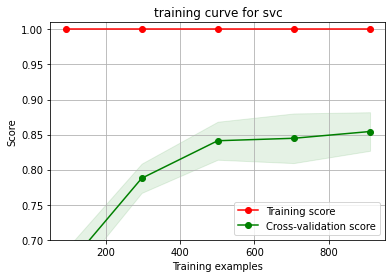

In [312]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( svc6, 'training curve for svc', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

In [313]:
print("Best estimator found by grid search:")
print("kernel poly at degree =4 is optimal", np.mean(prediction2 == y_test))
print("kernel poly at degree =1", np.mean(prediction3 == y_test))
print("kernel rbf at c=1 and gamma =gam", np.mean(prediction4 == y_test))
print("kernel rbf at c=10 and gamma =gam", np.mean(prediction5 == y_test))
print("kernel linear ", np.mean(prediction6 == y_test))

Best estimator found by grid search:
kernel poly at degree =4 is optimal 0.5233918128654971
kernel poly at degree =1 0.7777777777777778
kernel rbf at c=1 and gamma =gam 0.8742690058479532
kernel rbf at c=10 and gamma =gam 0.8859649122807017
kernel linear  0.7690058479532164


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

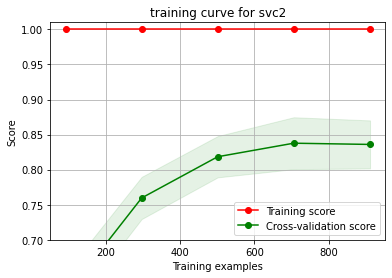

In [314]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( svc2, 'training curve for svc2', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

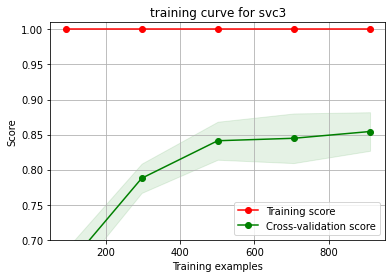

In [315]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( svc3, 'training curve for svc3', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

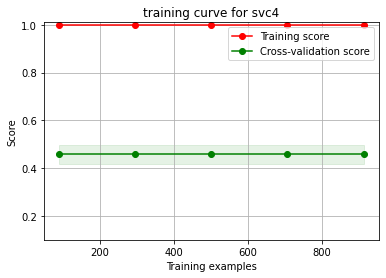

In [316]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( svc4, 'training curve for svc4', X, y, axes=axes, ylim=(0.1, 1.01), cv = cv, n_jobs=4)

In [317]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, prediction1, target_names=target_names))
print("Confusion matrix on the test data")
print(confusion_matrix(y_test, prediction1, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        65
  Donald Rumsfeld       0.96      0.71      0.81        34
    George W Bush       0.87      0.97      0.91       159
Gerhard Schroeder       0.87      0.65      0.74        40
       Tony Blair       0.88      0.86      0.87        44

         accuracy                           0.89       342
        macro avg       0.90      0.83      0.86       342
     weighted avg       0.89      0.89      0.88       342

Confusion matrix on the test data
[[ 61   0   4   0   0]
 [  1  24   6   2   1]
 [  3   1 154   0   1]
 [  1   0  10  26   3]
 [  0   0   4   2  38]]


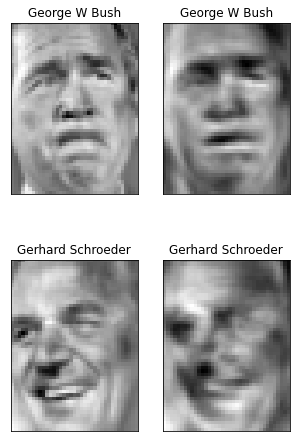

<Figure size 432x288 with 0 Axes>

In [318]:
correct_index = np.where(prediction1 == y_test)[0][:2]
correct_origin = X_test[correct_index, :]
correct_pca = pca.inverse_transform(X_test_pca1[correct_index,:])
plt.figure(figsize=(5, 8))
for i in range(2):
    plt.subplot(2,2,2*i+1)
    plt_face(correct_origin[i,:])
    plt.title(target_names[y_test[correct_index[i]]])
    
    plt.subplot(2,2,2*i+2)
    plt_face(correct_pca[i,:])
    plt.title(target_names[prediction1[correct_index[i]]])
plt.show()
plt.tight_layout()

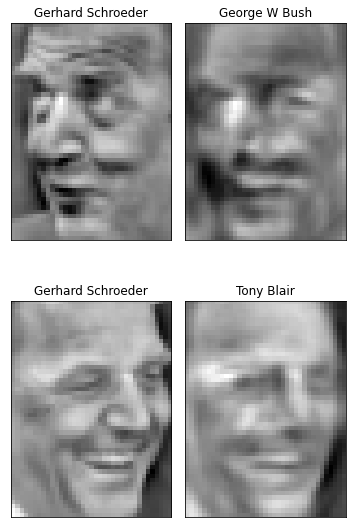

In [319]:
wrong_index = np.where(prediction1!=y_test)[0][:2]
wrong_origin = X_test[wrong_index, :]
wrong_pca = pca.inverse_transform(X_test_pca1[wrong_index,:])
plt.figure(figsize=(5, 8))
for i in range(2):
    plt.subplot(2,2,2*i+1)
    plt_face(wrong_origin[i,:])
    plt.title(target_names[y_test[wrong_index[i]]])
    
    plt.subplot(2,2,2*i+2)
    plt_face(wrong_pca[i,:])
    plt.title(target_names[prediction1[wrong_index[i]]])
    
plt.tight_layout()
plt.show()

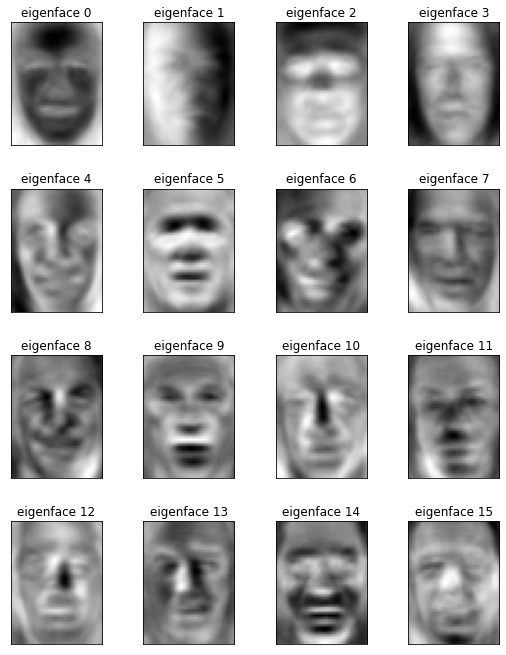

In [320]:
def plot(images, titles, h, w, n_row=4, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())





eigenface_titles = ["eigenface %d" %i for i in range(eigenfaces.shape[0])]
plot(eigenfaces, eigenface_titles, h, w)
pl.show()

# ICA PREPROCESSING

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [322]:
def dimensionality_reduction_ICA(n_components, X_train, height, width):
    print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
    t0 = time()
    ica = FastICA(n_components=n_components, whiten=True).fit(X_train)
    print("done in %0.3fs" % (time() - t0))

    eigenfaces = ica.components_.reshape((n_components, height, width))

    return ica, eigenfaces

def train_text_transform_Model(model, X_train, X_test):
    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_model = model.transform(X_train)
    X_test_model = model.transform(X_test)
    print("done in %0.3fs" % (time() - t0))

    return X_train_model, X_test_model



def classification_svc(X_train_model, y_train):
    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_model, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    return clf




def prediction(model, data):
    print("Predicting people's names on the test set")
    t0 = time()
    y_pred = model.predict(data)
    print("done in %0.3fs" % (time() - t0))

    return y_pred


def print_report(y_test, y_pred, target_names, n_classes):
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


def plot_images(images, titles, height, width, n_row=1, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()

def title(y_pred, y_test, target_names, i):
  pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
  true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
  return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [334]:
ica = FastICA(n_components=n_components, whiten=True).fit(X_train)
k_ica = FastICA(n_components=n_components, whiten=True).fit(X_train)
k_ica = ica.fit(X).transform(X)
k_ica /= k_ica.std(axis=0)

In [323]:
def classification_svc1(X_train_model, y_train):
    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf1 = SVC(C=C , kernel='poly', degree = 4)
    clf1 = clf1.fit(X_train_model, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf1)

    return clf1

In [324]:
def classification_svc2(X_train_model, y_train):
    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf2 = SVC(kernel='linear')
    clf2 = clf2.fit(X_train_model, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf2)

    return clf2

In [325]:
n_components = 150

ica, eigenfaces = dimensionality_reduction_ICA(n_components, X_train, h, w)

X_train_ica, X_test_ica = train_text_transform_Model(ica, X_train, X_test)

Extracting the top 150 eigenfaces from 798 faces
done in 3.548s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.043s


In [326]:
# Training a SVM classification model
clf = classification_svc(X_train_ica, y_train)
y_pred = prediction(clf, X_test_ica)
print_report(y_test, y_pred, target_names, n_classes)




Fitting the classifier to the training set
done in 11.882s
Best estimator found by grid search:
SVC(C=5000.0, class_weight='balanced', gamma=0.0001)
Predicting people's names on the test set
done in 0.044s
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.92      0.87        65
  Donald Rumsfeld       0.86      0.71      0.77        34
    George W Bush       0.95      0.91      0.93       159
Gerhard Schroeder       0.79      0.75      0.77        40
       Tony Blair       0.78      0.89      0.83        44

         accuracy                           0.87       342
        macro avg       0.84      0.84      0.83       342
     weighted avg       0.87      0.87      0.87       342

[[ 60   1   3   1   0]
 [  5  24   1   3   1]
 [  5   3 145   1   5]
 [  2   0   3  30   5]
 [  1   0   1   3  39]]


In [327]:
# Quantitative evaluation of the model quality on the test set

clf1 = classification_svc1(X_train_ica, y_train)
y_pred1 = prediction(clf1, X_test_ica)
# printing classification report
print_report(y_test, y_pred1, target_names, n_classes)

Fitting the classifier to the training set
done in 0.132s
Best estimator found by grid search:
SVC(C=100, degree=4, kernel='poly')
Predicting people's names on the test set
done in 0.025s
                   precision    recall  f1-score   support

     Colin Powell       1.00      0.03      0.06        65
  Donald Rumsfeld       0.00      0.00      0.00        34
    George W Bush       0.47      1.00      0.64       159
Gerhard Schroeder       0.00      0.00      0.00        40
       Tony Blair       1.00      0.02      0.04        44

         accuracy                           0.47       342
        macro avg       0.49      0.21      0.15       342
     weighted avg       0.54      0.47      0.31       342

[[  2   0  63   0   0]
 [  0   0  34   0   0]
 [  0   0 159   0   0]
 [  0   0  40   0   0]
 [  0   0  43   0   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
clf2 = classification_svc2(X_train_ica, y_train)
y_pred2 = prediction(clf2, X_test_ica)
# printing classification report
print_report(y_test, y_pred2, target_names, n_classes)

Fitting the classifier to the training set
done in 0.071s
Best estimator found by grid search:
SVC(kernel='linear')
Predicting people's names on the test set
done in 0.019s
                   precision    recall  f1-score   support

     Colin Powell       1.00      0.22      0.35        65
  Donald Rumsfeld       0.00      0.00      0.00        34
    George W Bush       0.49      1.00      0.65       159
Gerhard Schroeder       0.00      0.00      0.00        40
       Tony Blair       1.00      0.02      0.04        44

         accuracy                           0.51       342
        macro avg       0.50      0.25      0.21       342
     weighted avg       0.54      0.51      0.38       342

[[ 14   0  51   0   0]
 [  0   0  34   0   0]
 [  0   0 159   0   0]
 [  0   0  40   0   0]
 [  0   0  43   0   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


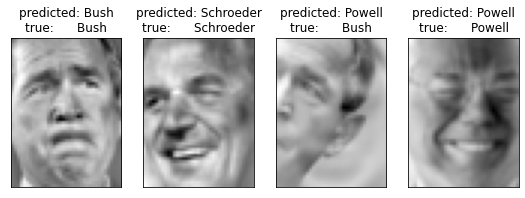

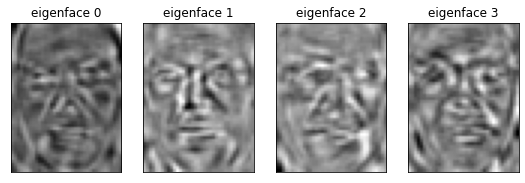

In [329]:
# printing images
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_images(X_test, prediction_titles, h, w)

# plot eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_images(eigenfaces, eigenface_titles, h, w)